In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv('ext_lt_intratrd_1_Data.csv')
df1.head(10)

,TIME,GEO,INDIC_ET,SITC06,PARTNER,Value,Flag and Footnotes
0,2010,European Union - 27 countries (from 2020),Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),:,NaN
1,2010,European Union - 27 countries (from 2020),Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),:,NaN
2,2010,European Union - 28 countries (2013-2020),Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),100.0,NaN
3,2010,European Union - 28 countries (2013-2020),Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),100.0,NaN
4,2010,Belgium,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),6.0,NaN
5,2010,Belgium,Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),6.1,NaN
6,2010,Bulgaria,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),0.5,NaN
7,2010,Bulgaria,Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),0.4,NaN
8,2010,Czechia,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.6,NaN
9,2010,Czechia,Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.2,NaN


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIME                600 non-null    int64  
 1   GEO                 600 non-null    object 
 2   INDIC_ET            600 non-null    object 
 3   SITC06              600 non-null    object 
 4   PARTNER             600 non-null    object 
 5   Value               600 non-null    object 
 6   Flag and Footnotes  0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 32.9+ KB


In [3]:
df1.drop(columns='Flag and Footnotes',axis=1)
df1['Value'] = df1['Value'].replace(':', '0').astype('float')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIME                600 non-null    int64  
 1   GEO                 600 non-null    object 
 2   INDIC_ET            600 non-null    object 
 3   SITC06              600 non-null    object 
 4   PARTNER             600 non-null    object 
 5   Value               600 non-null    float64
 6   Flag and Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.9+ KB


Text(0.5, 1.0, 'Share of imports by Spain(%) (2010-2019)')

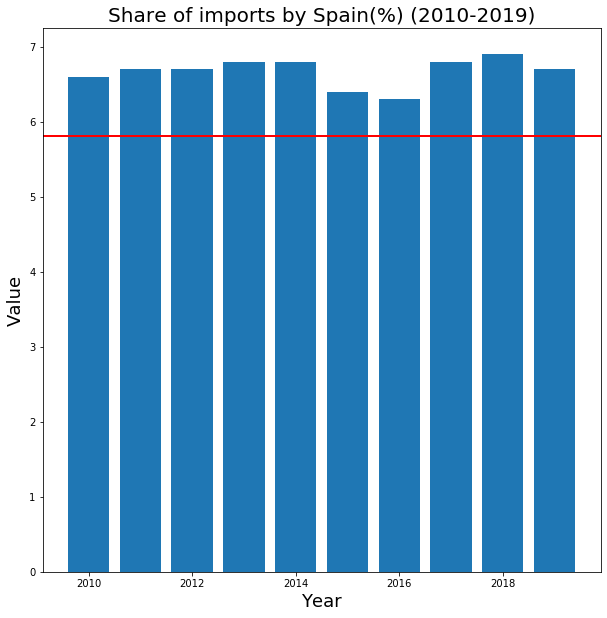

In [5]:
plt.figure(figsize=(10,10))
Spain = df1[df1['GEO']=='Spain']
plt.bar(Spain['TIME'],Spain['Value'])
plt.axhline(Spain['Value'].mean(),linewidth=2,color='red')
plt.xlabel('Year',fontsize=18)
plt.ylabel("Value",fontsize=18)
plt.title('Share of imports by Spain(%) (2010-2019)',fontsize=20)

In [6]:
df1 = df1[~df1.GEO.str.contains('European')]

df1.head()

,TIME,GEO,INDIC_ET,SITC06,PARTNER,Value,Flag and Footnotes
4,2010,Belgium,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),6.0,NaN
5,2010,Belgium,Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),6.1,NaN
6,2010,Bulgaria,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),0.5,NaN
7,2010,Bulgaria,Share of exports by Member State (%),Total - all products,Extra-EU28 (2013-2020),0.4,NaN
8,2010,Czechia,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.6,NaN


In [7]:
df1['TIME'].value_counts()

2019    56
2018    56
2017    56
2016    56
2015    56
2014    56
2013    56
2012    56
2011    56
2010    56
Name: TIME, dtype: int64

In [8]:
year_2010 = df1[df1['TIME']==2010]
year_2010.duplicated(subset=['GEO']).any()
year_2010.duplicated(subset=['GEO'])
year_2010.drop_duplicates(subset=['GEO'], inplace=True)
year_2010.head()

C:\Users\pope\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TIME,GEO,INDIC_ET,SITC06,PARTNER,Value,Flag and Footnotes
4,2010,Belgium,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),6.0,NaN
6,2010,Bulgaria,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),0.5,NaN
8,2010,Czechia,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.6,NaN
10,2010,Denmark,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.2,NaN
12,2010,Germany (until 1990 former territory of the FRG),Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),19.1,NaN


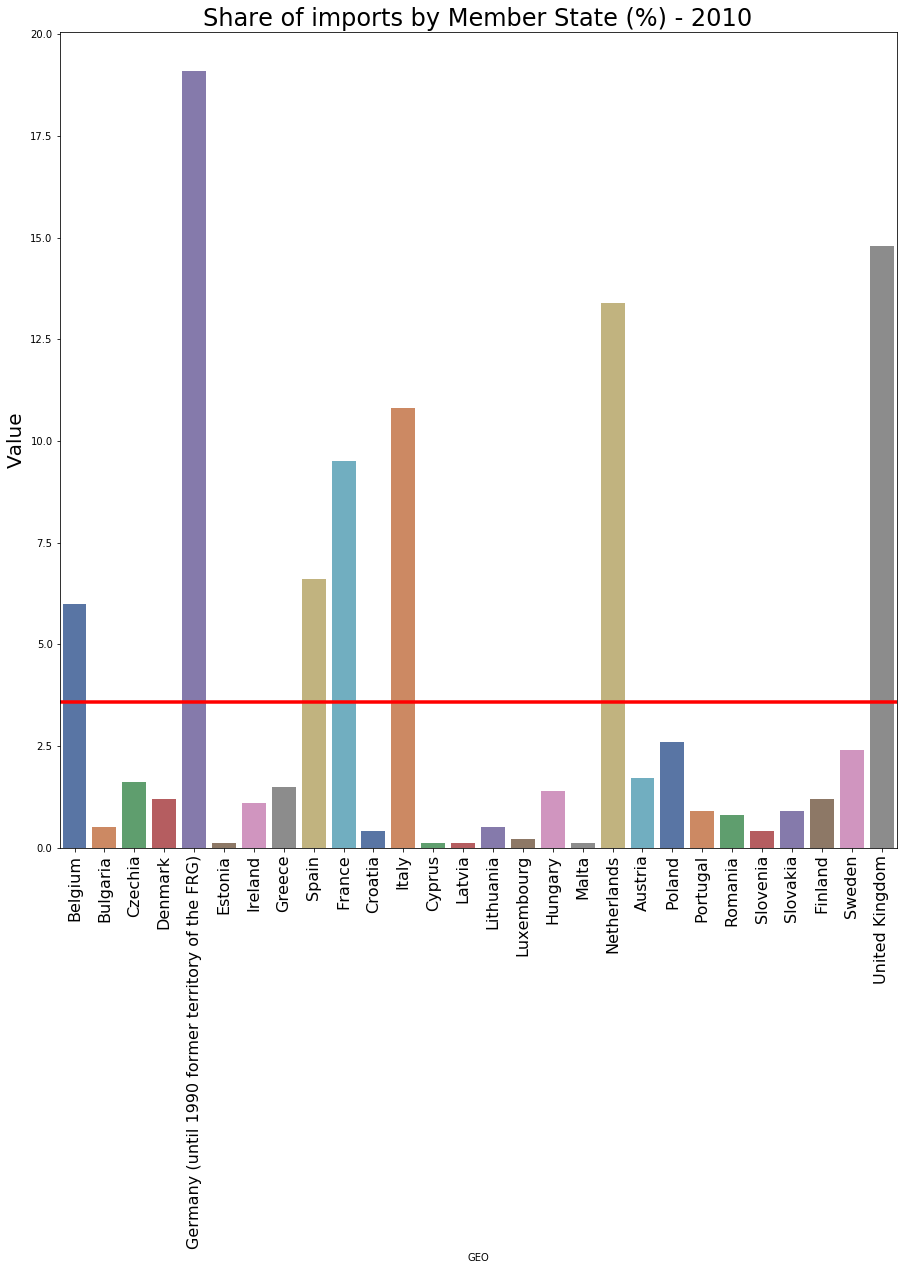

In [9]:
plt.figure(figsize=(15,15))
sns.barplot(x=year_2010['GEO'],y=year_2010['Value'],palette='deep',dodge=False)
plt.title("Share of imports by Member State (%) - 2010",fontsize=24)
plt.axhline(year_2010['Value'].mean(), label='Average',linewidth=3.5,color='red')
plt.xticks(rotation=90,fontsize=16)
plt.ylabel('Value',fontsize=20)
plt.show()

In [10]:
year_2019 = df1[df1['TIME']==2019]
year_2019.duplicated(subset=['GEO']).any()
year_2019.duplicated(subset=['GEO'])
year_2019.drop_duplicates(subset=['GEO'], inplace=True)
year_2019.head()

C:\Users\pope\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,TIME,GEO,INDIC_ET,SITC06,PARTNER,Value,Flag and Footnotes
544,2019,Belgium,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),6.6,NaN
546,2019,Bulgaria,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),0.6,NaN
548,2019,Czechia,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.9,NaN
550,2019,Denmark,Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),1.3,NaN
552,2019,Germany (until 1990 former territory of the FRG),Share of imports by Member State (%),Total - all products,Extra-EU28 (2013-2020),17.8,NaN


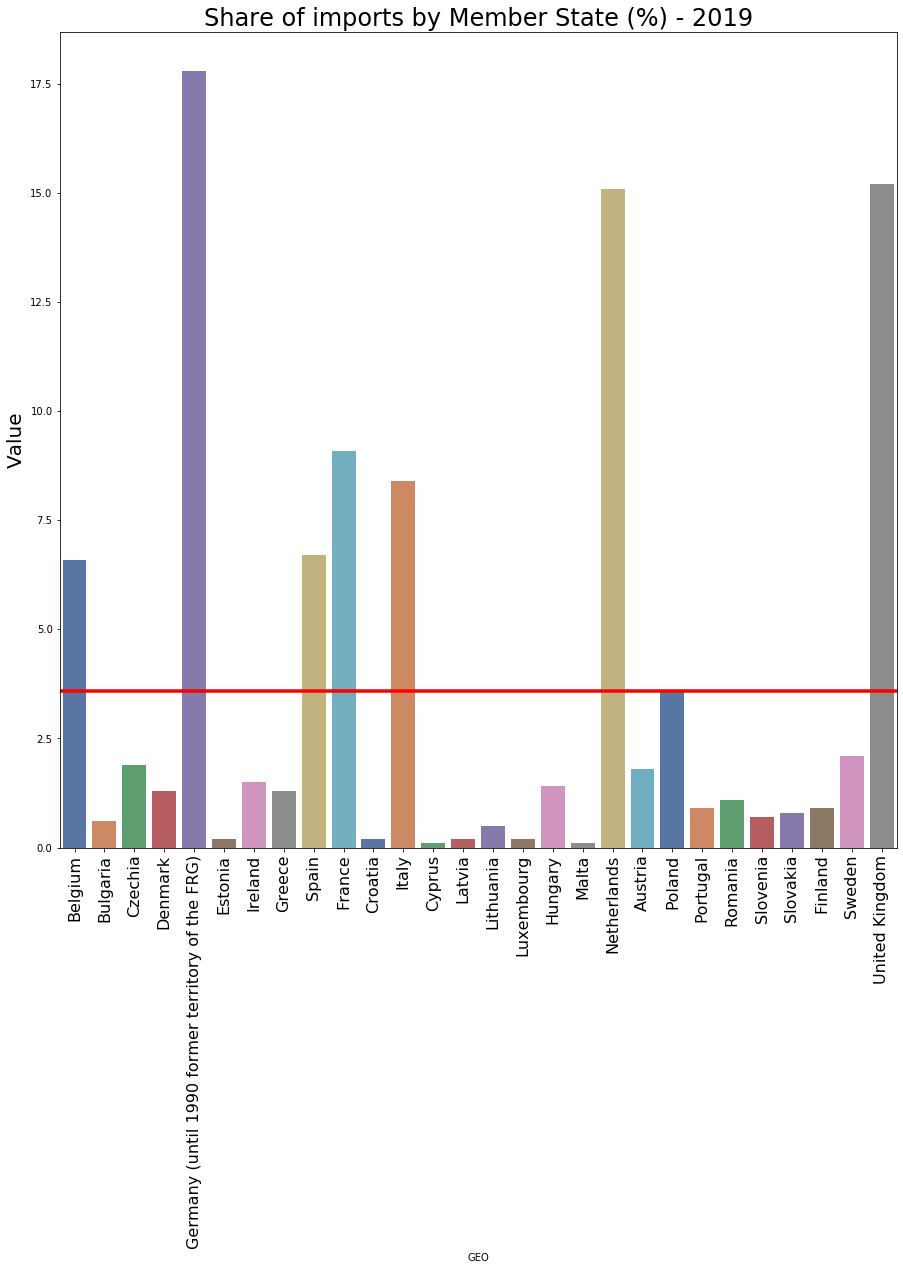

In [11]:
plt.figure(figsize=(15,15))
sns.barplot(x=year_2019['GEO'],y=year_2019['Value'],palette='deep',dodge=False)
plt.title("Share of imports by Member State (%) - 2019",fontsize=24)
plt.axhline(year_2019['Value'].mean(), label='Average',linewidth=3.5,color='red')
plt.xticks(rotation=90,fontsize=16)
plt.ylabel('Value',fontsize=20)
plt.show()